In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r'/Users/divyanshuvashishth/Downloads/sales_prediction.csv')

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Prep. Training and Testing datasets  
70% for training and 30% for testing


In [9]:
x = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED=43

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split( x, y, test_size = 0.3, random_state=SEED )

x_train.shape, x_test.shape

((5966, 11), (2557, 11))

In [12]:
x_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3058,NCM30,NaN,Low Fat,0.066970,Household,39.2796,OUT027,1985,Medium,Tier 3,Supermarket Type3
2485,FDL22,16.85,low fat,0.036596,Snack Foods,90.6488,OUT017,2007,NaN,Tier 2,Supermarket Type1
4100,FDV39,11.30,Low Fat,0.007274,Meat,196.6426,OUT013,1987,High,Tier 3,Supermarket Type1


In [13]:
y_train.head(3)

3058     701.7532
2485     633.8416
4100    5141.3076
Name: Item_Outlet_Sales, dtype: float64

In [14]:
# make copy to do EDA

x_train_new = x_train.copy()

BASIC EDA

In [17]:
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 3058 to 3392
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4929 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4299 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [21]:
x_train_new.isnull().sum()

Item_Identifier                 0
Item_Weight                  1037
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1667
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [23]:
num_data= x_train_new.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
3058,NaN,0.066970,39.2796,1985
2485,16.85,0.036596,90.6488,2007
4100,11.30,0.007274,196.6426,1987
6487,19.70,0.064909,88.5198,2004
6585,17.35,0.000000,102.9016,1997


In [24]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4929.000000,5966.000000,5966.000000,5966.000000
mean,12.832296,0.065667,140.979525,1997.750084
std,4.657712,0.051075,62.484874,8.402215
min,4.555000,0.000000,31.490000,1985.000000
25%,8.775000,0.026796,93.719900,1987.000000
50%,12.600000,0.053389,142.812800,1999.000000
75%,16.850000,0.094481,185.426600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [28]:
num_data.isnull().sum()

Item_Weight                  1037
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Item_Weight'>

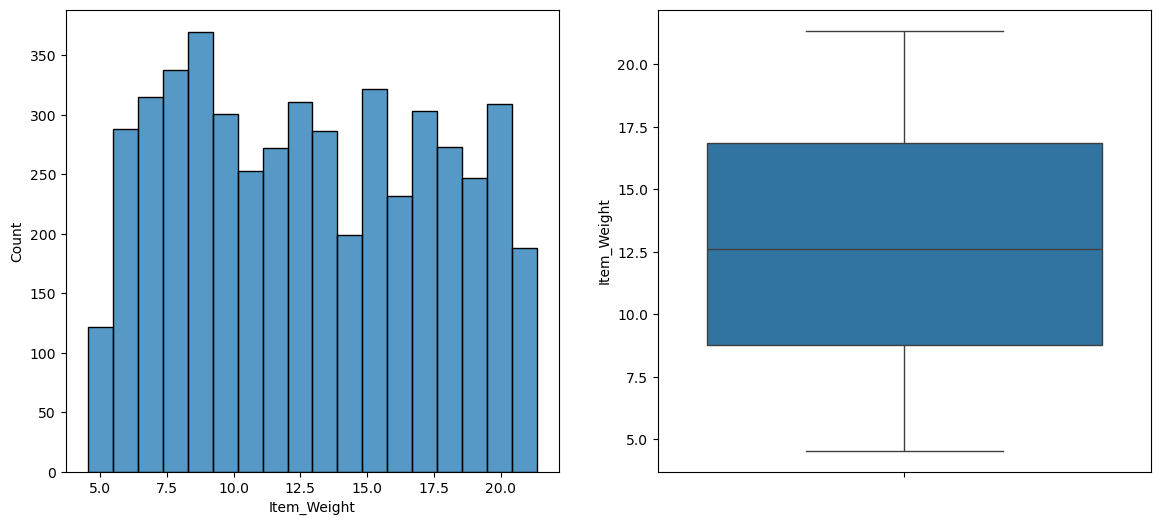

In [31]:
fig, ax =plt.subplots(1,2, figsize =(14,6))

sns.histplot(data= x_train_new, x='Item_Weight', ax=ax[0])
sns.boxplot(data= x_train_new, y='Item_Weight', ax=ax[1])

In [32]:
def visualize_feature(data_frame, col_name):
    fig, ax =plt.subplots(1,2, figsize =(14,6))

    sns.histplot(data=data_frame , x=col_name, ax=ax[0]);
    sns.boxplot(data=data_frame , y=col_name, ax=ax[1]);
    

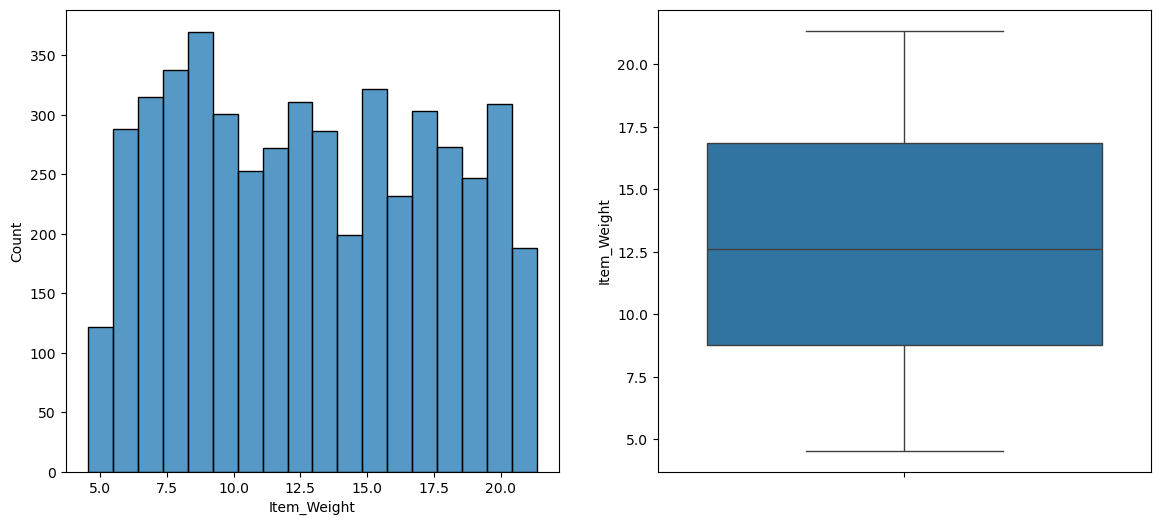

In [33]:
visualize_feature(x_train_new, 'Item_Weight')

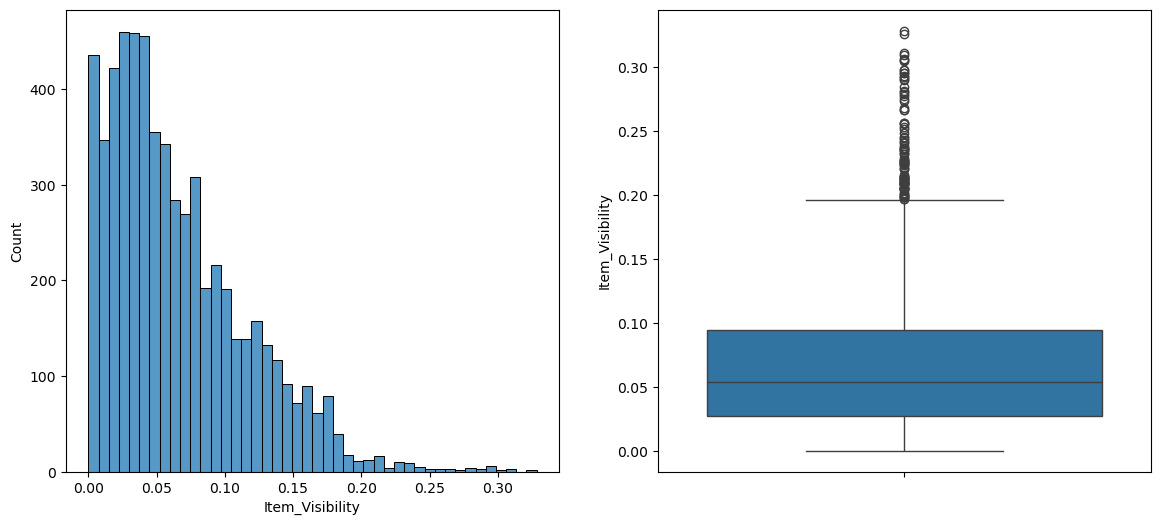

In [35]:
visualize_feature(x_train_new, 'Item_Visibility')

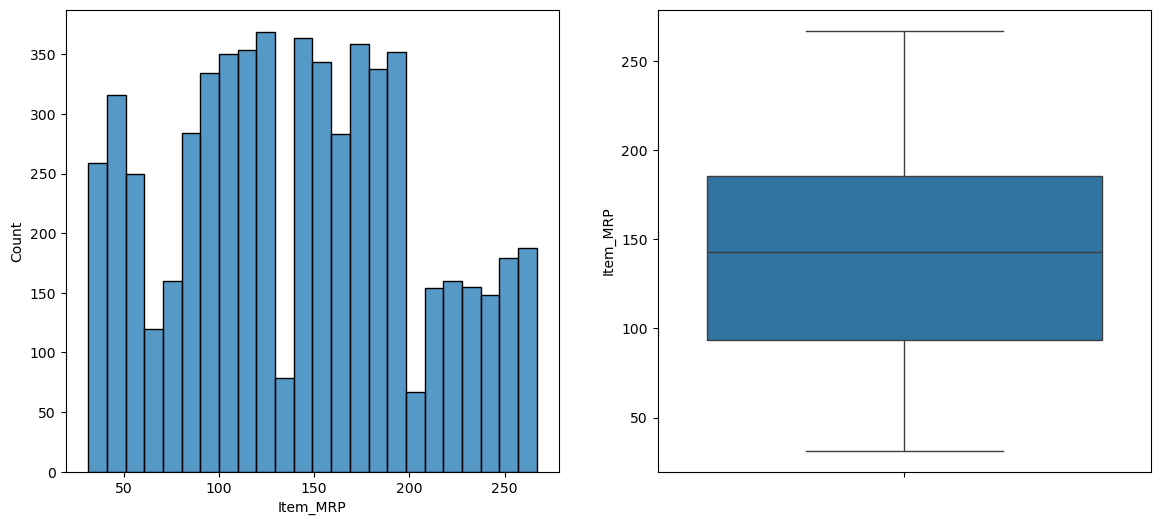

In [36]:
visualize_feature(x_train_new, 'Item_MRP')

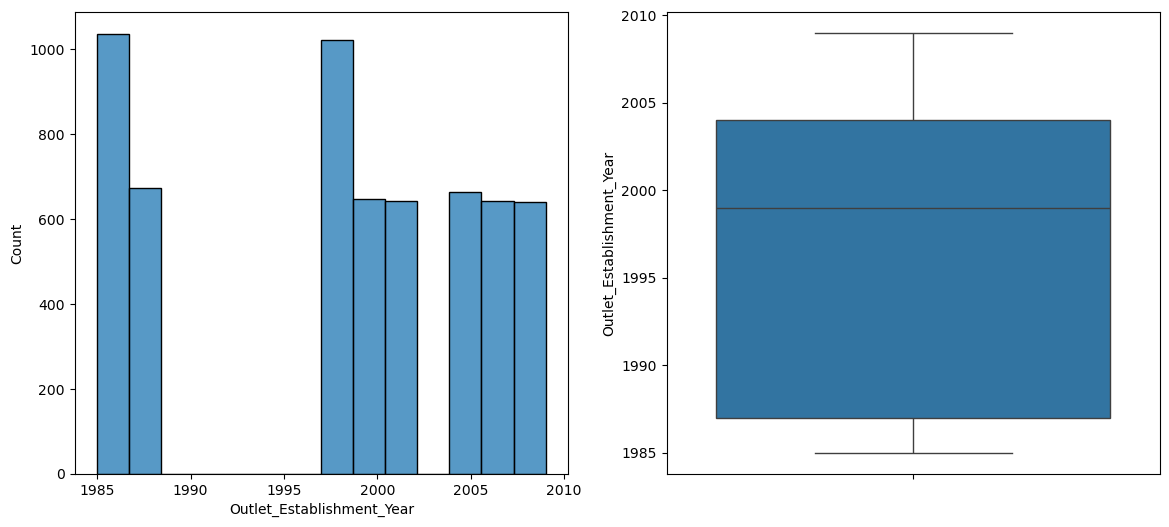

In [37]:
visualize_feature(x_train_new, 'Outlet_Establishment_Year')

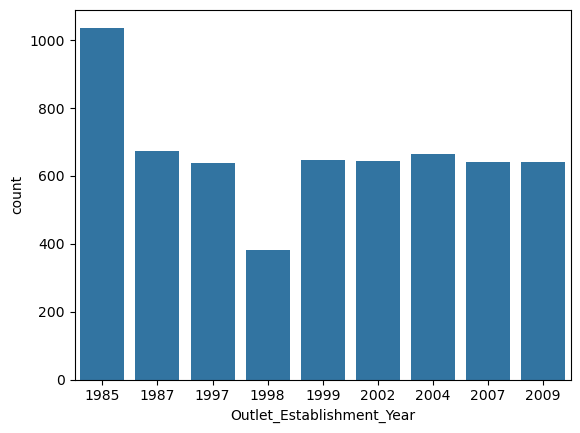

In [38]:
sns.countplot(data= x_train_new, x='Outlet_Establishment_Year');

Categorical data

In [42]:
cat_features= x_train_new.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
3058,NCM30,Low Fat,Household,OUT027,Medium,Tier 3,Supermarket Type3
2485,FDL22,low fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4100,FDV39,Low Fat,Meat,OUT013,High,Tier 3,Supermarket Type1
6487,FDA49,Low Fat,Canned,OUT035,Small,Tier 2,Supermarket Type1
6585,FDP60,Low Fat,Baking Goods,OUT046,Small,Tier 1,Supermarket Type1


In [43]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4299,5966,5966
unique,1545,5,16,10,3,3,4
top,FDP25,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,9,3550,877,672,1958,2365,3907


In [44]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1667
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [46]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
FDP25    9
FDV60    9
FDD38    9
FDX04    9
FDW26    8
        ..
FDK32    1
FDU28    1
FDO44    1
FDN52    1
FDB47    1
Name: count, Length: 1545, dtype: int64

In [47]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3550
Regular    2023
LF          222
low fat      87
reg          84
Name: count, dtype: int64

In [49]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    877
Snack Foods              840
Household                629
Frozen Foods             607
Dairy                    484
Canned                   459
Baking Goods             454
Health and Hygiene       361
Meat                     305
Soft Drinks              295
Breads                   167
Hard Drinks              146
Others                   128
Starchy Foods            101
Breakfast                 70
Seafood                   43
Name: count, dtype: int64

In [50]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT013    672
OUT027    671
OUT035    664
OUT049    647
OUT045    643
OUT017    642
OUT018    640
OUT046    639
OUT010    382
OUT019    366
Name: count, dtype: int64

In [51]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1958
Small     1669
High       672
Name: count, dtype: int64

In [53]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2365
Tier 2    1949
Tier 1    1652
Name: count, dtype: int64

In [54]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3907
Grocery Store         748
Supermarket Type3     671
Supermarket Type2     640
Name: count, dtype: int64

DATA WRANGLING N FEATURE ENGINEERING

In [58]:
ss =x_train_new['Item_Identifier'].apply(lambda x :x[:2])

In [62]:
ss.value_counts()

Item_Identifier
FD    4309
NC    1118
DR     539
Name: count, dtype: int64

In [70]:
def create_item_type(data_frame):
    data_frame['item_type']=data_frame['Item_Identifier'].apply(lambda x :x[:2])
    data_frame['item_type']=data_frame['item_type'].apply(lambda x :x[:2]).map({
                                            'FD' : 'Food',
                                            'NC' : 'Non Consumable',
                                            'DR' : 'Drink'
    })
    return data_frame 

In [72]:
x_train_new = create_item_type(x_train_new)
x_train_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_type
3058,NCM30,NaN,Low Fat,0.066970,Household,39.2796,OUT027,1985,Medium,Tier 3,Supermarket Type3,Non Consumable
2485,FDL22,16.85,low fat,0.036596,Snack Foods,90.6488,OUT017,2007,NaN,Tier 2,Supermarket Type1,Food
4100,FDV39,11.30,Low Fat,0.007274,Meat,196.6426,OUT013,1987,High,Tier 3,Supermarket Type1,Food
6487,FDA49,19.70,Low Fat,0.064909,Canned,88.5198,OUT035,2004,Small,Tier 2,Supermarket Type1,Food
6585,FDP60,17.35,Low Fat,0.000000,Baking Goods,102.9016,OUT046,1997,Small,Tier 1,Supermarket Type1,Food


In [73]:
# now filling up the missing item_weight
#mapping ID with weight and where ID is unique, using item_type

In [75]:
item_id_weight_pivot = x_train_new.pivot_table( values = 'Item_Weight', index = 'Item_Identifier').reset_index()
item_id_weight_mapping = dict(zip(item_id_weight_pivot['Item_Identifier'], item_id_weight_pivot['Item_Weight']))
list(item_id_weight_mapping.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [76]:
item_type_weight_pivot = x_train_new.pivot_table( values = 'Item_Weight', index = 'item_type').reset_index()
item_type_weight_pivot

,item_type,Item_Weight
0,Drink,12.117863
1,Food,12.795323
2,Non Consumable,13.315840


In [79]:
item_type_weight_mapping= dict(zip(item_type_weight_pivot['item_type'], item_type_weight_pivot['Item_Weight']))
list(item_type_weight_mapping.items())[:10]                                  

[('Drink', 12.117863436123349),
 ('Food', 12.795322580645161),
 ('Non Consumable', 13.315839532412328)]

In [81]:
def fill_item_weight(data_frame):
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(item_id_weight_mapping))
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'item_type'].map(item_type_weight_mapping))
    return data_frame

In [82]:
x_train_new= fill_item_weight(x_train_new)
x_train_new.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1667
Outlet_Location_Type            0
Outlet_Type                     0
item_type                       0
dtype: int64

In [86]:
# filling in outlet_size

In [89]:
from scipy.stats import mode

In [93]:
x_train_new.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1667
Outlet_Location_Type            0
Outlet_Type                     0
item_type                       0
dtype: int64

In [95]:
def item_fat_content(data_frame):
    data_frame['Item_Fat_Content']= data_frame['Item_Fat_Content'].replace({
                                                'Low Fat' : 'Low_Fat',
                                                'LF' : 'Low_Fat',
                                                'reg' : 'Regular',
                                                'low fat' : 'Low_Fat'
          })
    return data_frame


In [97]:
x_train_new =  item_fat_content(x_train_new)
x_train_new['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3859
Regular    2107
Name: count, dtype: int64

In [99]:
x_train_new.groupby(by=['item_type', 'Item_Fat_Content']).size()
                    

item_type       Item_Fat_Content
Drink           Low_Fat              491
                Regular               48
Food            Low_Fat             2250
                Regular             2059
Non Consumable  Low_Fat             1118
dtype: int64

In [101]:
def correction_item_fat_content(data_frame):
    data_frame.loc[data_frame['item_type'] == 'Non Consumable', 'Item_Fat_Content']= 'non edible'
    return data_frame



In [103]:
x_train_new = correction_item_fat_content(x_train_new)

In [105]:
x_train_new.groupby(by=['item_type', 'Item_Fat_Content']).size()

item_type       Item_Fat_Content
Drink           Low_Fat              491
                Regular               48
Food            Low_Fat             2250
                Regular             2059
Non Consumable  non edible          1118
dtype: int64

In [107]:
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 3058 to 3392
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4299 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
 11  item_type                  5966 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 605.9+ KB


In [109]:
#now prep dataset for ML

In [111]:
def Dataset(data_frame):
    # create item_type
    data_frame = create_item_type(data_frame)
    # filling in the missing item weights
    data_frame = fill_item_weight(data_frame)
    #filling in outlet_size
    #data_frame = mode_func(data_frame)
    #standardizing item_fat_content
    data_frame = item_fat_content(data_frame)
    #correction item_fat_content
    data_frame = correction_item_fat_content(data_frame)

    return data_frame

In [113]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1037
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1667
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [115]:
x_train= Dataset(x_train)
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1667
Outlet_Location_Type            0
Outlet_Type                     0
item_type                       0
dtype: int64

In [117]:
x_test.isnull().sum()

Item_Identifier                0
Item_Weight                  426
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  743
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [119]:
x_test = Dataset(x_test)
x_test.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  743
Outlet_Location_Type           0
Outlet_Type                    0
item_type                      0
dtype: int64

# handling categorical data

In [122]:
cat_features = x_train.select_dtypes(include=['object'])
cat_features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_type
3058,NCM30,non edible,Household,OUT027,Medium,Tier 3,Supermarket Type3,Non Consumable
2485,FDL22,Low_Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1,Food
4100,FDV39,Low_Fat,Meat,OUT013,High,Tier 3,Supermarket Type1,Food
6487,FDA49,Low_Fat,Canned,OUT035,Small,Tier 2,Supermarket Type1,Food
6585,FDP60,Low_Fat,Baking Goods,OUT046,Small,Tier 1,Supermarket Type1,Food
...,...,...,...,...,...,...,...,...
8499,NCK53,non edible,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,Non Consumable
2064,FDG50,Low_Fat,Canned,OUT018,Medium,Tier 3,Supermarket Type2,Food
7985,NCX29,non edible,Health and Hygiene,OUT013,High,Tier 3,Supermarket Type1,Non Consumable
2303,FDV59,Low_Fat,Breads,OUT046,Small,Tier 1,Supermarket Type1,Food


In [124]:
from sklearn.preprocessing import OneHotEncoder

In [126]:
OHE = OneHotEncoder(handle_unknown = 'ignore')
OHE.fit(cat_features)

OneHotEncoder(handle_unknown='ignore')

In [128]:
OHE_features = OHE.get_feature_names_out( input_features = cat_features.columns)
OHE_features

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'item_type_Drink', 'item_type_Food',
       'item_type_Non Consumable'], dtype=object)

In [130]:
num_features = x_train.select_dtypes(exclude = ['object']).reset_index(drop= True)
num_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,19.100,0.066970,39.2796,1985
1,16.850,0.036596,90.6488,2007
2,11.300,0.007274,196.6426,1987
3,19.700,0.064909,88.5198,2004
4,17.350,0.000000,102.9016,1997
...,...,...,...,...
5961,11.600,0.037574,100.0042,2004
5962,7.405,0.015334,92.7146,2009
5963,10.000,0.089078,147.1102,1987
5964,13.350,0.048027,218.9166,1997


In [132]:
cat_features_train = x_train.select_dtypes(include=['object'])
x_train_cat_ohe = pd.DataFrame(OHE.transform(cat_features_train).toarray(), columns=OHE_features)
x_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_type_Drink,item_type_Food,item_type_Non Consumable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [134]:
x_train_final = pd.concat([num_features , x_train_cat_ohe], axis = 1)
x_train_final

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_type_Drink,item_type_Food,item_type_Non Consumable
0,19.100,0.066970,39.2796,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,16.850,0.036596,90.6488,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,11.300,0.007274,196.6426,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,19.700,0.064909,88.5198,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,17.350,0.000000,102.9016,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,11.600,0.037574,100.0042,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5962,7.405,0.015334,92.7146,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5963,10.000,0.089078,147.1102,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5964,13.350,0.048027,218.9166,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [135]:
final_columns = x_train_final.columns
final_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'item_type_Drink', 'item_type_Food',
       'item_type_Non Consumable'],
      dtype='object', length=1592)

In [137]:
num_features_test = x_test.select_dtypes(exclude = ['object']).reset_index(drop= True)
cat_features_test = x_test.select_dtypes(include = ['object'])
x_test_cat_ohe = pd.DataFrame(OHE.transform(cat_features_test).toarray(), columns=OHE_features)
x_test_final = pd.concat([num_features_test , x_test_cat_ohe], axis = 1)
x_test_final = x_test_final[final_columns]

x_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_type_Drink,item_type_Food,item_type_Non Consumable
0,13.650,0.012752,55.5588,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,16.750,0.032653,190.8162,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5.175,0.037368,86.9224,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,21.250,0.019407,119.3756,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16.700,0.102056,184.0292,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# modelling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

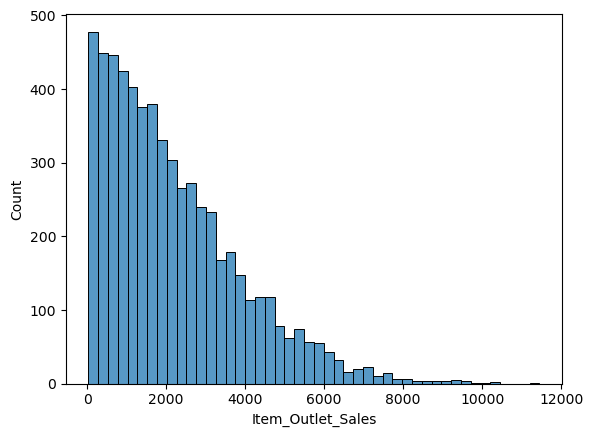

In [141]:
sns.histplot(y_train)

In [142]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb 
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

In [149]:
def train_eval_model(model, x_train, y_train, cv=5):
    cv_results = cross_validate( model, x_train, y_train, cv=cv, scoring = ('r2', 'neg_root_mean_squared_error'),)
    print('model: ', model)
    r2_scores = cv_results['test_r2']
    print('R2 CV results', r2_scores)
    print('R2 CV results mean/ stdev', np.mean(r2_scores) ,'/' , np.std(r2_scores))

    rsme_scores = cv_results['test_neg_root_mean_squared_error']
    rsme_scores = [-1*score for score in rsme_scores]
    print('RSME CV results: ', rsme_scores)
    print('RSME CV results mean/stdev:', np.mean(rsme_scores), '/' , np.std(rsme_scores))

In [151]:
rf = RandomForestRegressor(random_state=SEED)
train_eval_model(model=rf, x_train= x_train_final, y_train=y_train)

model:  RandomForestRegressor(random_state=43)
R2 CV results [0.54997906 0.54037775 0.5040583  0.54747312 0.54485162]
R2 CV results mean/ stdev 0.5373479683972647 / 0.016945498434796757
RSME CV results:  [1121.8248534657375, 1180.0655438922036, 1207.2179493031133, 1118.6562293607055, 1161.1078323359789]
RSME CV results mean/stdev: 1157.7744816715478 / 33.98609305289909


In [155]:
gb = GradientBoostingRegressor(random_state=SEED)
train_eval_model(model=gb, x_train= x_train_final, y_train=y_train)

model:  GradientBoostingRegressor(random_state=43)
R2 CV results [0.58954216 0.58286765 0.55585196 0.59871165 0.58642101]
R2 CV results mean/ stdev 0.5826788861128641 / 0.014407476967803711
RSME CV results:  [1071.3786117986213, 1124.1973206073278, 1142.4422143145139, 1053.4228312723485, 1106.8156490516783]
RSME CV results mean/stdev: 1099.6513254088982 / 32.9281447758428


In [157]:
hist = HistGradientBoostingRegressor(random_state=SEED)
train_eval_model(model=hist, x_train= x_train_final, y_train=y_train)

model:  HistGradientBoostingRegressor(random_state=43)
R2 CV results [0.56373354 0.56070901 0.53435103 0.5559407  0.56043158]
R2 CV results mean/ stdev 0.5550331728649789 / 0.010636061930022376
RSME CV results:  [1104.5480277451666, 1153.6704205329377, 1169.767883793788, 1108.1407781783694, 1141.0621402875718]
RSME CV results mean/stdev: 1135.4378501075666 / 25.46339230633074


In [169]:
xgr = xgb.XGBRegressor(objective= 'reg:squarederror' ,random_state=SEED)
train_eval_model(model=xgr, x_train= x_train_final, y_train=y_train)

model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=43, ...)
R2 CV results [0.56668132 0.55397058 0.52995965 0.56071005 0.55151296]
R2 CV results mean/ stdev 0.5525669116405865 / 0.012487565055018865
RSME CV results:  [1100.8100907471141, 1162.4850096933349, 1175.2707815141002, 1102.1738082180639, 1152.5797

In [161]:
lgbr = LGBMRegressor(random_state=SEED)
train_eval_model(model=lgbr, x_train= x_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 47
[LightGBM] [Info] Start training from score 2195.022194
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 47
[LightGBM] [Info] Start training from score 2176.561579
[LightGBM] [Warning] Found